# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
#from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
load_dotenv()
#%matplotlib inline

True

In [6]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prestonclaypoole/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [8]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
print(newsapi)

In [9]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 3305


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Bitcoin Mixer Designed to Bypass Money Laundering Laws Fined $60 Million for Bypassing Money Laundering Laws',
 'description': 'The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of “bitcoin mixers” Helix and Coin Ninja. The penalty is the first of its kind in the United States.Read more...',
 'url': 'https://gizmodo.com/bitcoin-mixer-designed-to-bypass-money-laundering-laws-1845424354',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/jhxr5xvmk7xprthwguhd.jpg',
 'publishedAt': '2020-10-20T15:40:00Z',
 'content': 'The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars]'}

In [10]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1140


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Luxury watch maker Breitling issues digital certificates on the Ethereum blockchain',
 'description': 'Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital passport that certifies the origin of the watch. Behind the…',
 'url': 'http://techcrunch.com/2020/10/15/luxury-watch-maker-breitling-issues-digital-certificates-on-the-ethereum-blockchain/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/10/Arianee.jpg?w=711',
 'publishedAt': '2020-10-15T09:44:51Z',
 'content': 'Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars]'}

In [11]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.set_index("Date", inplace=True)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
Date,,,,,
2020-10-20,-0.7184,0.154,0.846,0.000,The Financial Crimes Enforcement Network (FinC...
2020-09-24,0.2500,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...
2020-10-19,-0.6597,0.198,0.802,0.000,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...
2020-09-22,-0.5267,0.128,0.872,0.000,A US district judge has sentenced a UK Nationa...
2020-10-19,-0.6597,0.203,0.797,0.000,Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS...


In [12]:
# Create the Bitcoin sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.set_index("Date", inplace=True)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
Date,,,,,
2020-10-15,0.0000,0.000,1.000,0.000,Breitling is partnering with Arianee to issue ...
2020-09-30,-0.2960,0.061,0.939,0.000,"September\r\n30, 2020\r\n8 min read\r\nOpinion..."
2020-10-14,-0.4215,0.132,0.783,0.085,Portions of the global economy melted down in ...
2020-10-02,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
2020-10-14,0.1779,0.000,0.954,0.046,Amazon is treating Prime members to an onslaug...


In [13]:
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.00000,20.000000,20.000000,20.000000
mean,0.18096,0.045200,0.887650,0.067150
std,0.47280,0.070408,0.055696,0.047828
min,-0.71840,0.000000,0.751000,0.000000
25%,-0.06830,0.000000,0.865500,0.045000
50%,0.50700,0.000000,0.910000,0.090000
75%,0.50700,0.066250,0.910000,0.090000
max,0.63690,0.203000,1.000000,0.192000


In [14]:
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.219259,0.032471,0.877412,0.090176
std,0.418356,0.052424,0.087486,0.084460
min,-0.659700,0.000000,0.722000,0.000000
25%,0.000000,0.000000,0.802000,0.046000
50%,0.226300,0.000000,0.887000,0.070000
75%,0.507000,0.057000,0.939000,0.128000
max,0.912000,0.162000,1.000000,0.278000


### Questions:

#### Q: Which coin had the highest mean positive score?

* A: ETH had the highest positive mean score at 0.081667 vs. the BTC with 0.069600.

#### Q: Which coin had the highest compound score?

* A: ETH had the "max" highest compound score at 0.912000 vs. the BTC with a "max" of 0.507000. BTH has the highest mean compound score at 0.263190 vs. ETH with 0.191900.

#### Q. Which coin had the highest positive score?

* A: ETH had the highest "max" positive score at 0.27800 vs. the BTC with a "max" of 0.090000. ETH also has a higher mean positive score. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Returns lemmatized, stop words, tokenized and free of non-letter characters"""
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
print(tokenizer(str(bitcoin_df["Text"])))

['date', 'financial', 'crimes', 'enforcement', 'network', 'finc', 'image', 'copyrightchandler', 'guoimage', 'captionrn', 'c', 'world', 'newsrnalexis', 'akwagyiramrnlagos', 'reut', 'us', 'district', 'judge', 'ha', 'sentenced', 'uk', 'nationa', 'emerging', 'marketsrnalexis', 'akwagyiramrnlagos', 'july', 'wa', 'first', 'another', 'day', 'pa', 'robot', 'colleague', 'satoshi', 'nakaboto', 'writes', 'ab', 'robot', 'colleague', 'satoshi', 'nakaboto', 'writes', 'ab', 'reuters', 'staffrnlondon', 'reuters', 'bank', 'reuters', 'staffrnlondon', 'reuters', 'bank', 'robot', 'colleague', 'satoshi', 'nakaboto', 'writes', 'ab', 'robot', 'colleague', 'satoshi', 'nakaboto', 'writes', 'ab', 'robot', 'colleague', 'satoshi', 'nakaboto', 'writes', 'ab', 'reuters', 'staffrnlondon', 'reuters', 'britain', 'robot', 'colleague', 'satoshi', 'nakaboto', 'writes', 'ab', 'robot', 'colleague', 'satoshi', 'nakaboto', 'writes', 'ab', 'robot', 'colleague', 'satoshi', 'nakaboto', 'writes', 'ab', 'robot', 'colleague', 'sat

In [18]:
# Create a new tokens column for bitcoin
bitcoin_df["Tokens"] = bitcoin_df["Text"].apply(tokenizer)
bitcoin_df["Tokens"].head()

Date
2020-10-20    [financial, crimes, enforcement, network, finc...
2020-09-24    [image, copyrightchandler, guoimage, caption, ...
2020-10-19    [world, newsalexis, akwagyiramlagos, reuters, ...
2020-09-22    [us, district, judge, ha, sentenced, uk, natio...
2020-10-19    [emerging, marketsalexis, akwagyiramlagos, reu...
Name: Tokens, dtype: object

In [19]:
# Create a new tokens column for ethereum
ethereum_df["Tokens"] = ethereum_df["Text"].apply(tokenizer)
ethereum_df.tail()

,Compound,Negative,Neutral,Positive,Text,Tokens
Date,,,,,,
2020-10-14,0.8548,0.000,0.722,0.278,Ethereum’s popularity has congested the networ...,"[ethereums, popularity, ha, congested, network..."
2020-10-01,0.4215,0.097,0.766,0.137,(Photo by Yuriko Nakao)\r\nGetty Images\r\nYes...,"[photo, yuriko, nakaogetty, imagesyesterday, w..."
2020-10-14,0.1779,0.000,0.954,0.046,Amazon is treating Prime members to an onslaug...,"[amazon, treating, prime, member, onslaught, d..."
2020-10-21,0.2732,0.000,0.937,0.063,The price of Bitcoin (BTC) has been rallying s...,"[price, bitcoin, btc, ha, rallying, strongly, ..."
2020-09-28,-0.6597,0.162,0.838,0.000,"A record-high 458,000 Ethereum options contrac...","[recordhigh, ethereum, option, contract, expir..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
btc_top10 = ngrams(tokenizer(str(bitcoin_df["Text"])),2)
Counter(btc_top10).most_common(10)

[(('robot', 'colleague'), 10),
 (('colleague', 'satoshi'), 10),
 (('satoshi', 'nakaboto'), 10),
 (('nakaboto', 'writes'), 10),
 (('writes', 'ab'), 10),
 (('ab', 'robot'), 7),
 (('reuters', 'staffrnlondon'), 3),
 (('staffrnlondon', 'reuters'), 3),
 (('ab', 'reuters'), 2),
 (('reuters', 'bank'), 2)]

In [22]:
# Generate the Ethereum N-grams where N=2
eth_top10 = ngrams(tokenizer(str(ethereum_df["Text"])),2)
Counter(eth_top10).most_common(10)

[(('rn', 'min'), 2),
 (('amazon', 'treating'), 2),
 (('treating', 'prime'), 2),
 (('prime', 'member'), 2),
 (('member', 'onslaug'), 2),
 (('date', 'breitling'), 1),
 (('breitling', 'partnering'), 1),
 (('partnering', 'arianee'), 1),
 (('arianee', 'issue'), 1),
 (('issue', 'septemberrn'), 1)]

In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
btc_top10 = tokenizer(str(bitcoin_df["Text"]))
token_count(btc_top10, N=10)

[('robot', 10),
 ('colleague', 10),
 ('satoshi', 10),
 ('nakaboto', 10),
 ('writes', 10),
 ('ab', 10),
 ('reuters', 6),
 ('staffrnlondon', 3),
 ('akwagyiramrnlagos', 2),
 ('bank', 2)]

In [25]:
# Get the top 10 words for Ethereum
eth_top10 = tokenizer(str(ethereum_df["Text"]))
token_count(eth_top10, N=10)

[('rn', 2),
 ('min', 2),
 ('amazon', 2),
 ('treating', 2),
 ('prime', 2),
 ('member', 2),
 ('onslaug', 2),
 ('bitcoin', 2),
 ('ha', 2),
 ('date', 1)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [27]:
#Complete the word cloud function
def wordcloud(text, title):
    wc = WordCloud().generate(text)
    plt.axis("off")
    plt.title(title)
    plt.imshow(wc)

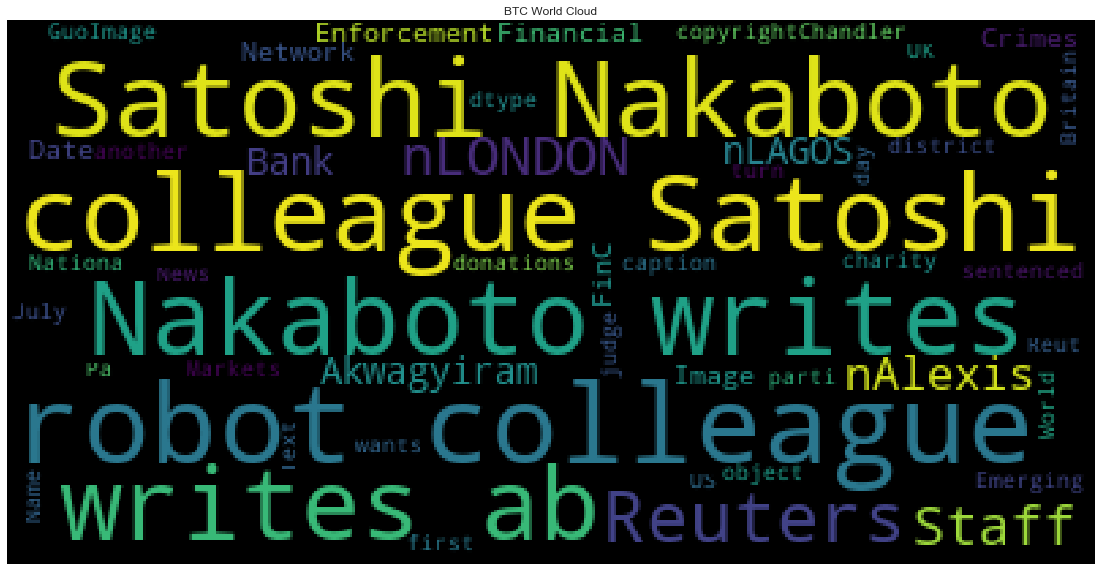

In [28]:
#Pass in the Bitcoin word cloud
wordcloud(str(bitcoin_df["Text"]),"BTC World Cloud")

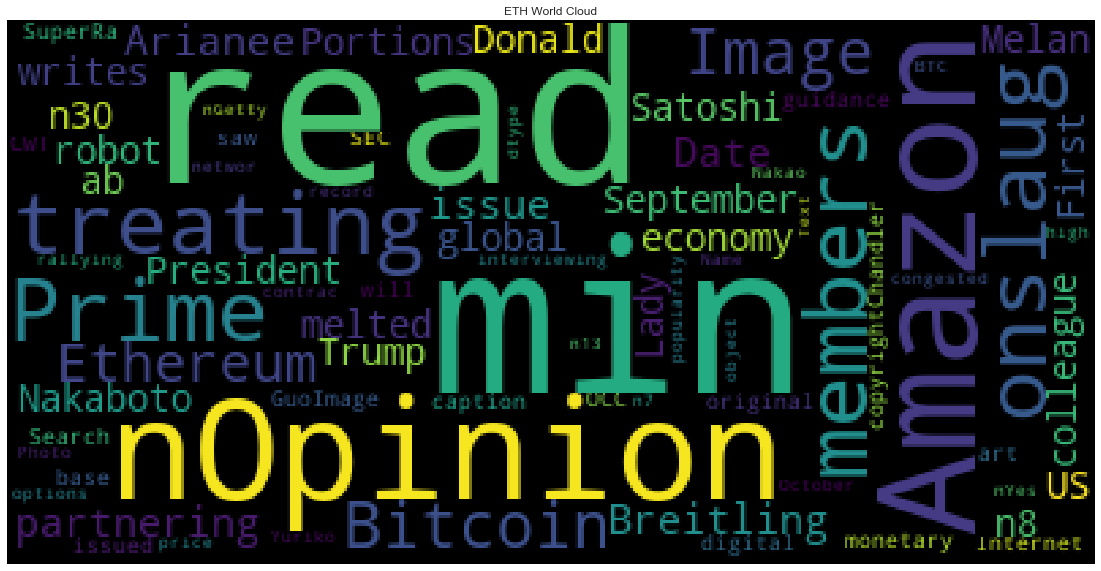

In [29]:
#Pass in the Bitcoin word cloud
wordcloud(str(ethereum_df["Text"]),"ETH World Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [60]:
# Concatenate all of the bitcoin text together
btc_concat = " ".join(bitcoin_df.Text.to_list())
print(btc_concat)

The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars] Image copyrightChandler GuoImage caption
 Chandler Guo at one of his cryptocurrency mines
Chandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars] World News
Alexis Akwagyiram
LAGOS (Reuters) - Ozioma Egemasi says Nigerian police slapped, whipped and struck him with the butt of a pistol when he refused to pay them a bribe. Then he heard them … [+6412 chars] A US district judge has sentenced a UK National to five years in federal prison for participating in the cybercrime activities of hacking collective group “The Dark Overlord.” Nathan Wyatt was extrad… [+961 chars] Emerging Markets
Alexis Akwagyiram
LAGOS (Reuters) - Ozioma Egemasi says Nigerian police slapped, whipped and struck him with the butt of a pisto

In [61]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_concat)

# Add a title to the document
btc_ner.user_data["title"] = "BTC NER"

In [62]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [68]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

The Financial Crimes Enforcement Network ORG
$60 million MONEY
Larry Dean Harmon PERSON
Helix GPE
Coin Ninja ORG
first ORDINAL
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
World News ORG
Reuters ORG
Ozioma Egemasi ORG
Nigerian NORP
US GPE
UK GPE
five years DATE
The Dark Overlord WORK_OF_ART
Nathan Wyatt PERSON
Reuters ORG
Ozioma Egemasi ORG
Nigerian NORP
July 15 DATE
first ORDINAL
Parag Agrawal ORG
Twitter ORG
Travis Scot PERSON
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Reuters ORG
LONDON GPE
Reuters ORG
Bank of England ORG
Andrew Bailey PERSON
Monday DATE
Bitcoin GPE
Reuters ORG
LONDON GPE
Reuters ORG
Bank of England ORG
Andrew Bailey PERSON
Monday DATE
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakabo

---

## Ethereum NER

In [63]:
# Concatenate all of the bitcoin text together
eth_concat = " ".join(ethereum_df.Text.to_list())
print(eth_concat)

Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars] September
30, 2020
8 min read
Opinions expressed by Entrepreneur contributors are their own.
If you’ve had even half an eye on the cryptocurrency space in 2020, then you can’t have missed the sur… [+8935 chars] Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power amid the chaos.
Grayscale Investments, the world's largest digital-currency… [+5397 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.
Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3081 chars] Amazon is treating Prime members to an onslaught of deals now that it's officially Prime Day. One discount could score you the Ledger Nano S crypt

In [64]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_concat)

# Add a title to the document
eth_ner.user_data["title"] = "ETH NER"

In [65]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [66]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

Arianee PERSON
September DATE
30 DATE
2020 DATE
8 CARDINAL
half CARDINAL
2020 DATE
2020 DATE
Grayscale Investments ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Amazon ORG
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
US GPE
Donald Trump PERSON
First ORDINAL
Lady Melania Trump PERSON
the White House ORG
July 7, 2020 DATE
JIM WATSON PERSON
Getty Images ORG
Friday DATE
Bitcoin GPE
Bitcoins NORP
SuperRare ORG
SuperRare ORG
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
SEC ORG
OCC ORG
fiat ORG
yesterday DATE
fiat ORG
this year DATE
CWT ORG
CWT ORG
October DATE
13 DATE
2020 DATE
7 min QUANTITY
today DATE
Yuriko Nakao PERSON
Yesterday DATE
today DATE
Bitcoin GPE
Amazon ORG
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
Bitcoin GPE
BTC ORG
Ethereum ( ORG
ETH ORG
ETH ORG
BTC ORG
458,000 CARDINAL
September 25 DATE
Shaun Fernando PERSON
